<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
mnistDB=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnistDB.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
X_train=X_train.reshape((60000,28,28,1))

In [12]:
X_test=X_test.reshape((10000,28,28,1))

In [13]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [14]:
cnnModel_MNIST=keras.models.Sequential()


In [17]:
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=X_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Flatten())
cnnModel_MNIST.add(keras.layers.Dense(128,activation="relu"))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
cnnModel_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [23]:
cnnModel_MNIST.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [24]:

cnnModel_MNIST.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1538 - accuracy: 0.9524 - val_loss: 0.0462 - val_accuracy: 0.9850
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 4/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0319 - val_accuracy: 0.9888
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0343 - val_a

In [25]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.0 MB/s 


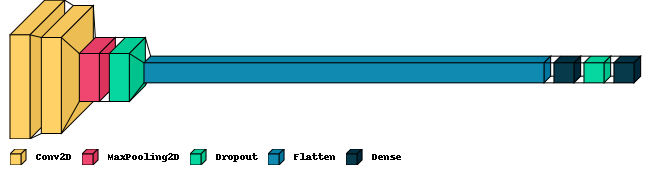

In [26]:
import visualkeras
visualkeras.layered_view(cnnModel_MNIST,legend=True)
